<a href="https://colab.research.google.com/github/rthakkarr1/Predictive-mining-on-exoplanet-dataset/blob/main/predictive_mining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pandas numpy scikit-learn

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from google.colab import files
import matplotlib.pyplot as plt

# Upload the dataset file from your local computer
uploaded = files.upload()

# Read the dataset
df = pd.read_csv(next(iter(uploaded)))

selected_columns = ['pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'st_teff', 'st_mass']
df = df[selected_columns]

# Handling missing values if any
df = df.dropna()

# Split the data into features (X) and target variable (y)
X = df.drop('pl_bmasse', axis=1)  # Features
y = df['pl_bmasse']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model
def train_and_evaluate(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
mse_dt = train_and_evaluate(dt_model)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
mse_knn = train_and_evaluate(knn_model)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf = train_and_evaluate(rf_model)

# Print the mean squared errors
print("Decision Tree MSE:", mse_dt)
print("K-Nearest Neighbors MSE:", mse_knn)
print("Random Forest MSE:", mse_rf)


Saving PSCompPars_2023.09.17_08.49.34.csv to PSCompPars_2023.09.17_08.49.34 (2).csv
Decision Tree MSE: 1400377.270007115
K-Nearest Neighbors MSE: 331204.9176125139
Random Forest MSE: 593225.8076594073


In [ ]:

selected_columns = ['pl_orbper', 'pl_rade', 'pl_bmasse', 'pl_dens', 'st_teff', 'st_mass']
df = df[selected_columns]

# Handling missing values if any
df = df.dropna()

# Split the data into features (X) and target variable (y)
X = df.drop('pl_bmasse', axis=1)  # Features
y = df['pl_bmasse']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Function to train and evaluate a model
def train_and_evaluate(model):
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    return mse

# Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
mse_dt = train_and_evaluate(dt_model)

# K-Nearest Neighbors
knn_model = KNeighborsRegressor(n_neighbors=5)
mse_knn = train_and_evaluate(knn_model)

# Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
mse_rf = train_and_evaluate(rf_model)

# Print the mean squared errors
print("Decision Tree MSE:", mse_dt)
print("K-Nearest Neighbors MSE:", mse_knn)
print("Random Forest MSE:", mse_rf)

NameError: ignored

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5140 entries, 0 to 5513
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pl_orbper  5140 non-null   float64
 1   pl_rade    5140 non-null   float64
 2   pl_bmasse  5140 non-null   float64
 3   pl_dens    5140 non-null   float64
 4   st_teff    5140 non-null   float64
 5   st_mass    5140 non-null   float64
dtypes: float64(6)
memory usage: 281.1 KB


,pl_orbper,pl_rade,pl_bmasse,pl_dens,st_teff,st_mass
0,326.03000,12.1,6165.60000,19.10,4742.0,2.70
1,516.21997,12.3,4684.81420,13.80,4213.0,2.78
2,185.84000,12.9,1525.50000,3.90,4813.0,2.20
3,1765.03890,12.6,2559.47216,7.03,5338.0,0.91
4,798.50000,13.5,565.73740,1.26,5750.0,1.08


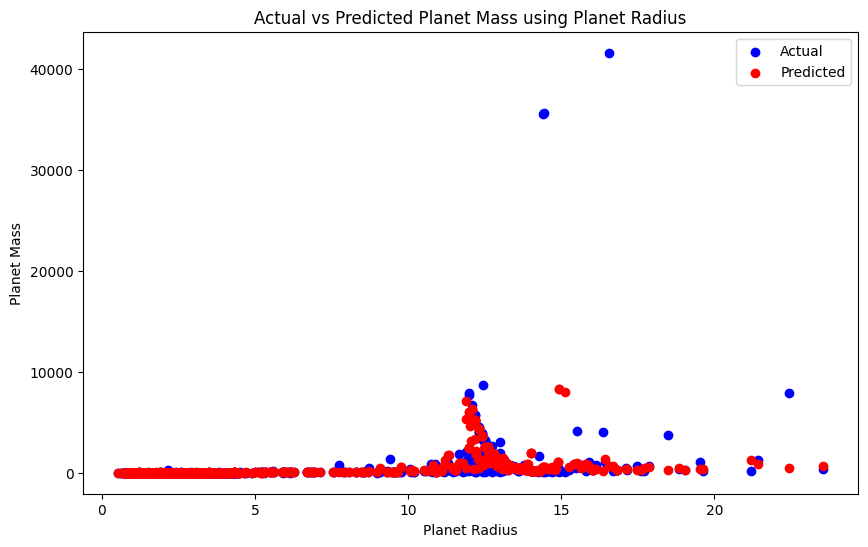

In [ ]:
# Task: Predict planet mass using only planet radius
selected_columns_task = ['pl_rade', 'pl_bmasse']
df_task = df[selected_columns_task].dropna()

X_task = df_task[['pl_rade']]
y_task = df_task['pl_bmasse']
X_train_task, X_test_task, y_train_task, y_test_task = train_test_split(X_task, y_task, test_size=0.2, random_state=42)

scaler_task = StandardScaler()
X_train_scaled_task = scaler_task.fit_transform(X_train_task)
X_test_scaled_task = scaler_task.transform(X_test_task)

#train and evaluate
knn_model_task = KNeighborsRegressor(n_neighbors=5)
knn_model_task.fit(X_train_scaled_task, y_train_task)
y_pred_task = knn_model_task.predict(X_test_scaled_task)
mse_task = mean_squared_error(y_test_task, y_pred_task)

#plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_task['pl_rade'], y_test_task, color='blue', label='Actual')
plt.scatter(X_test_task['pl_rade'], y_pred_task, color='red', label='Predicted')
plt.title('Actual vs Predicted Planet Mass using Planet Radius')
plt.xlabel('Planet Radius')
plt.ylabel('Planet Mass')
plt.legend()
plt.show()

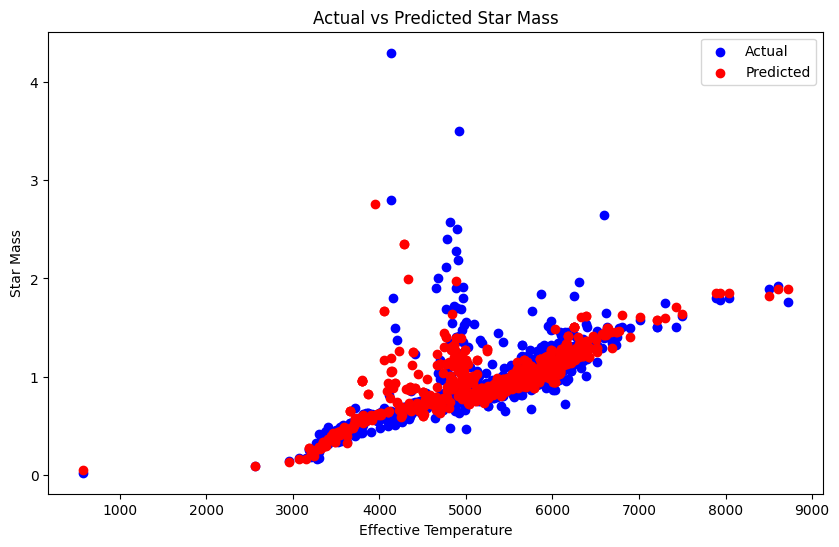

(Predict Star Mass) MSE: 0.07780598054474709


In [ ]:
#Task 2: Predict star mass using star temperature
selected_columns_task2 = ['st_teff', 'st_mass']
df_task2 = df[selected_columns_task2].dropna()

X_task2 = df_task2[['st_teff']]
y_task2 = df_task2['st_mass']
X_train_task2, X_test_task2, y_train_task2, y_test_task2 = train_test_split(X_task2, y_task2, test_size=0.2, random_state=42)

scaler_task2 = StandardScaler()
X_train_scaled_task2 = scaler_task2.fit_transform(X_train_task2)
X_test_scaled_task2 = scaler_task2.transform(X_test_task2)

#train and evaluate
knn_model_task2 = KNeighborsRegressor(n_neighbors=5)
knn_model_task2.fit(X_train_scaled_task2, y_train_task2)
y_pred_task2 = knn_model_task2.predict(X_test_scaled_task2)
mse_task2 = mean_squared_error(y_test_task2, y_pred_task2)

#plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_task2['st_teff'], y_test_task2, color='blue', label='Actual')
plt.scatter(X_test_task2['st_teff'], y_pred_task2, color='red', label='Predicted')
plt.title('Actual vs Predicted Star Mass')
plt.xlabel('Effective Temperature')
plt.ylabel('Star Mass')
plt.legend()
plt.show()

print("(Predict Star Mass) MSE:", mse_task2)

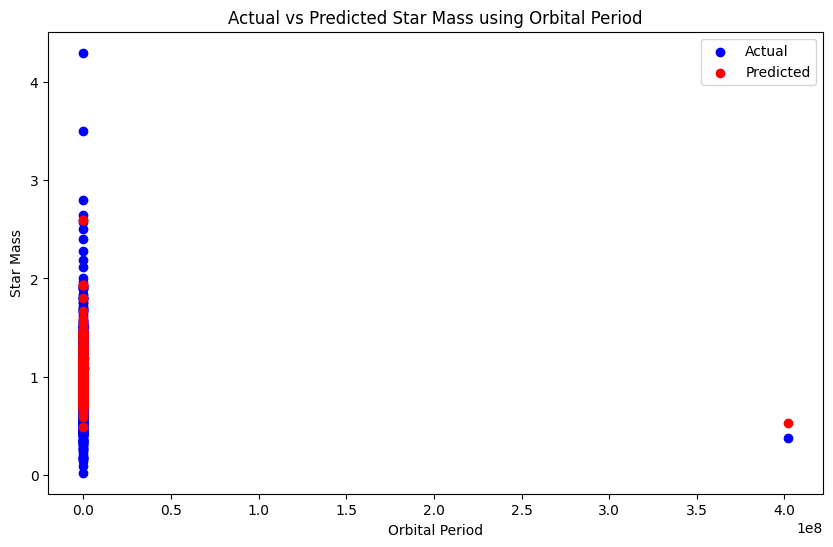

Predict Star Mass using Orbital Period MSE: 0.11939434241245135


In [ ]:
selected_columns_task3 = ['pl_orbper', 'st_mass']
df_task3 = df[selected_columns_task3].dropna()

X_task3 = df_task3[['pl_orbper']]
y_task3 = df_task3['st_mass']
X_train_task3, X_test_task3, y_train_task3, y_test_task3 = train_test_split(X_task3, y_task3, test_size=0.2, random_state=42)

scaler_task3 = StandardScaler()
X_train_scaled_task3 = scaler_task3.fit_transform(X_train_task3)
X_test_scaled_task3 = scaler_task3.transform(X_test_task3)

#train and evaluate
knn_model_task3 = KNeighborsRegressor(n_neighbors=5)
knn_model_task3.fit(X_train_scaled_task3, y_train_task3)
y_pred_task3 = knn_model_task3.predict(X_test_scaled_task3)
mse_task3 = mean_squared_error(y_test_task3, y_pred_task3)

#plot
plt.figure(figsize=(10, 6))
plt.scatter(X_test_task3['pl_orbper'], y_test_task3, color='blue', label='Actual')
plt.scatter(X_test_task3['pl_orbper'], y_pred_task3, color='red', label='Predicted')
plt.title('Actual vs Predicted Star Mass using Orbital Period')
plt.xlabel('Orbital Period')
plt.ylabel('Star Mass')
plt.legend()
plt.show()

print("Predict Star Mass using Orbital Period MSE:", mse_task3)

In [ ]:
import numpy as np
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
def classify_star_mass_task1_with_constraints(star_temperature):
    star_temperature = np.array([[star_temperature]])
    new_data_task1 = scaler_task2.transform(star_temperature)
    predicted_star_mass_task1 = knn_model_task2.predict(new_data_task1)

    if predicted_star_mass_task1[0] > 1:
        return predicted_star_mass_task1[0], "Bigger than Sun"
    else:
        return predicted_star_mass_task1[0], "Smaller than Sun"

def classify_planet_mass_task2_with_constraints(planet_radius):
    planet_radius = np.array([[planet_radius]])
    new_data_task2 = scaler_task.transform(planet_radius)
    predicted_planet_mass_task2 = knn_model_task.predict(new_data_task2)

    if predicted_planet_mass_task2[0] > 22:
        return predicted_planet_mass_task2[0], "Bigger than Jupiter"
    elif 8 <= predicted_planet_mass_task2[0] <= 22:
        return predicted_planet_mass_task2[0], "Bigger than Uranus but Smaller than Jupiter"
    elif 1 <= predicted_planet_mass_task2[0] < 8:
        return predicted_planet_mass_task2[0], "Bigger than Earth but Smaller than Uranus"

def classify_star_mass_task3_with_constraints(orbital_period):
    orbital_period = np.array([[orbital_period]])
    new_data_task3 = scaler_task3.transform(orbital_period)
    predicted_star_mass_task3 = knn_model_task3.predict(new_data_task3)

    if predicted_star_mass_task3[0] > 1:
        return predicted_star_mass_task3[0], "Bigger than Sun"
    else:
        return predicted_star_mass_task3[0], "Smaller than Sun"

# User interaction
for _ in range(3):
    star_temperature_input = float(input("Enter the star temperature to predict its mass: "))
    planet_radius_input = float(input("Enter the planet radius to predict its mass: "))
    orbital_period_input = float(input("Enter the planet orbital period to predict its star mass: "))

    predicted_mass_task1, classification_task1 = classify_star_mass_task1_with_constraints(star_temperature_input)
    predicted_mass_task2, classification_task2 = classify_planet_mass_task2_with_constraints(planet_radius_input)
    predicted_mass_task3, classification_task3 = classify_star_mass_task3_with_constraints(orbital_period_input)

    print(f"Predicted Star Mass: {predicted_mass_task1}, Classification: {classification_task1}")
    print(f"Predicted Planet Mass: {predicted_mass_task2}, Classification: {classification_task2}")
    print(f"Predicted Star Mass: {predicted_mass_task3}, Classification: {classification_task3}\n")


KeyboardInterrupt: ignored